In [1]:
%matplotlib inline

import numpy as np # NUMPY
import pandas as pd # PANDAS
import matplotlib.pyplot as plt # MATPLOTLIB
import seaborn as sns # SEABORN
import scipy
import sklearn
from sklearn.decomposition import PCA
import cv2
import os 
from skimage import filters
from scipy import ndimage

In [5]:
def Algoritm1(expmap, target_face, emotions_vector, intensities_vector):
    map_weights = expmap
    for i in range(0,6):        
        print(i)
    return map_weights

In [20]:



target_face = 0
emotions_vector = [1,2,3,4,5,6]
intensities_vector = [0,0,0,100,0,0]
exMap = np.load('expmaptest.npy')
maplabels = np.load('expmaplabels.npy',allow_pickle=True )
Algoritm1(exMap,target_face, emotions_vector,intensities_vector)
dicc = maplabels.item()


0
1
2
3
4
5


dict_keys([(1, 7), (7, 0), (7, 1), (3, 7), (4, 7), (5, 7), (6, 7), (7, 7), (7, 6), (4, 6), (5, 5), (6, 5), (6, 4), (7, 4), (2, 2), (1, 2), (0, 3), (0, 2), (0, 1), (0, 0), (2, 4), (1, 4), (1, 5), (0, 6), (0, 5), (3, 5), (2, 6), (7, 3), (4, 1), (4, 2), (3, 2), (3, 3), (4, 3), (4, 4), (4, 0), (3, 0), (2, 0), (5, 1), (5, 0)])

In [3]:
ls 

 archive/
 Backup-codes-aliciaysuerte.txt
 cartoon_save.csv
 cartoon_save_test.csv
 cartoonTexture*
 ck+copyAgain/
 ck+copyAgainT/
 ck+copynew/
 ck+warpedAgainT_V1/
 ck+warpedAgainT_V2/
 ck+warpedAgainT_V3/
 clavetoke.png
 code_cartoonTexture/
'code_cartoonTexture (1)'/
 code_cartoonTexture.zip
 croppedCartoonV1/
 croppedCartoonV1.zip
 cropped_imgex_cartoon.png
 cropped_imgex.png
 cropped_imgex_texture.png
 cropped_img.png
 croppedTextureV1/
 croppedTextureV1.zip
 Notebook/
 nuevoFEARSAD/
 probando_aligned_img/
 probando_aligned_img_test/
 probando_aligned_landmarks.csv
 probando_aligned_landmarks_test.csv
 probando_cartoon_folder/
 probando_cartoon_folder_test/
 probando_shapediff.csv
 probando_shapediff_test.csv
 probando_struct_features.csv
 probando_struct_features_test.csv
 probando_texture_folder/
 probando_texture_folder_test/
 README.md
 recomendacions.png
 snapshots2.zip
 Synthesis_of_Realistic_Facial_Expressions_Using_Expression_Map.pdf
 texture_save.csv
 texture_save_test.cs

In [5]:
img = cv2.imread('../S504_006_00000018.png', 0) 
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [16]:

with open('../S504_006_00000018_landmarks.txt') as f:
    lines = f.readlines()
lines

['   1.9331863e+02   2.4035584e+02\n',
 '   1.9176772e+02   2.7605135e+02\n',
 '   1.9126226e+02   3.1142655e+02\n',
 '   1.9403972e+02   3.4655861e+02\n',
 '   2.0776731e+02   3.7899784e+02\n',
 '   2.3096261e+02   4.0565529e+02\n',
 '   2.5867931e+02   4.2765783e+02\n',
 '   2.8802376e+02   4.4699983e+02\n',
 '   3.2213986e+02   4.5317221e+02\n',
 '   3.5873891e+02   4.5026858e+02\n',
 '   3.9150306e+02   4.3256131e+02\n',
 '   4.2031045e+02   4.0917079e+02\n',
 '   4.4569638e+02   3.8229452e+02\n',
 '   4.5785402e+02   3.4751745e+02\n',
 '   4.6265731e+02   3.1060191e+02\n',
 '   4.6364427e+02   2.7360742e+02\n',
 '   4.6160532e+02   2.3676972e+02\n',
 '   2.1405437e+02   1.8225545e+02\n',
 '   2.3418552e+02   1.6930878e+02\n',
 '   2.5829478e+02   1.6665398e+02\n',
 '   2.8241800e+02   1.6617534e+02\n',
 '   3.0653011e+02   1.6617692e+02\n',
 '   3.4927592e+02   1.5412042e+02\n',
 '   3.7819318e+02   1.5639788e+02\n',
 '   4.0692042e+02   1.5678057e+02\n',
 '   4.3395664e+02   1.66

In [23]:
landmarks = []
for l in lines:
    #print(float(l.split(' ')[3]), float(l.split(' ')[6] ))
    landmarks.append([float(l.split(' ')[3]),float(l.split(' ')[6])])
landmarks = np.asarray(landmarks)
landmarks

array([[193.31863, 240.35584],
       [191.76772, 276.05135],
       [191.26226, 311.42655],
       [194.03972, 346.55861],
       [207.76731, 378.99784],
       [230.96261, 405.65529],
       [258.67931, 427.65783],
       [288.02376, 446.99983],
       [322.13986, 453.17221],
       [358.73891, 450.26858],
       [391.50306, 432.56131],
       [420.31045, 409.17079],
       [445.69638, 382.29452],
       [457.85402, 347.51745],
       [462.65731, 310.60191],
       [463.64427, 273.60742],
       [461.60532, 236.76972],
       [214.05437, 182.25545],
       [234.18552, 169.30878],
       [258.29478, 166.65398],
       [282.418  , 166.17534],
       [306.53011, 166.17692],
       [349.27592, 154.12042],
       [378.19318, 156.39788],
       [406.92042, 156.78057],
       [433.95664, 166.2975 ],
       [450.36072, 189.24776],
       [325.67227, 206.11337],
       [325.33778, 232.89294],
       [325.1687 , 259.66239],
       [325.16433, 286.34486],
       [292.96872, 308.31937],
       [

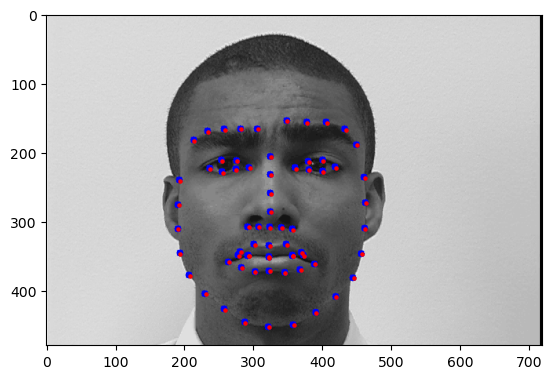

In [92]:
import matplotlib.image as mpimg
image = cv2.imread('../S504_006_00000018.png')
image2= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imwrite('../LANDMARKED_IMG_GRAY.png', image2)
image3 = cv2.imread('../LANDMARKED_IMG_GRAY.png')
pts = landmarks
#plt.plot(640, 570, "og", markersize=10)  # og:shorthand for green circle
diff = plt.scatter(pts[:, 0], pts[:, 1], marker="o", color="red", s=5)
for i in pts:    
    image3 = cv2.circle(image3, (int(i[0]),int(i[1])), radius=5, color=(0,0,255), thickness=-1)
cv2.imwrite('../LANDMARKED_IMG.png', image3)
plt.imshow(image3)


TypeError: 'AxesImage' object is not subscriptable

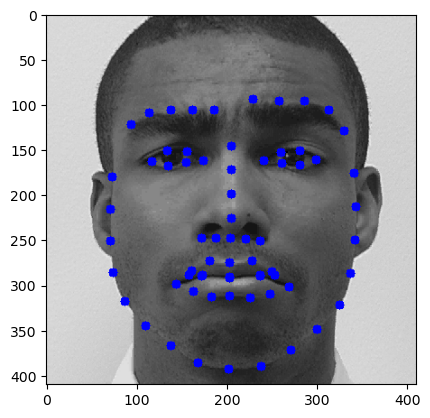

In [93]:
image4 = cv2.imread('../LANDMARKED_IMG.png' )
image5 = image4[60:470, 120:530]#410, 410
cv2.imwrite('../LANDMARKED_IMG_CROPPED.png', image5)
plt.imshow(image5)[40:450, 170:580]

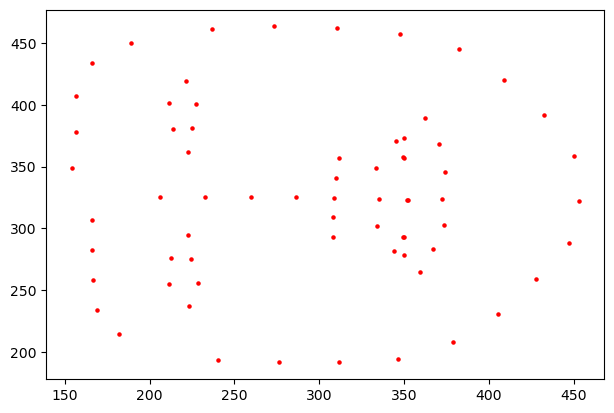

In [105]:
import matplotlib.image as mpimg
#image = cv2.imread('../S504_006_00000018.png')
#image2= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#cv2.imwrite('../LANDMARKED_IMG_GRAY.png', image2)
#image3 = cv2.imread('../LANDMARKED_IMG_GRAY.png')
pts = landmarks
height, width = img.shape
figsize = width / float(100), height / float(100)
figure = plt.figure(figsize=figsize)
#plt.plot(640, 570, "og", markersize=10)  # og:shorthand for green circle
diff = plt.scatter(pts[:, -1], pts[:, 0], marker="o", color="red", s=5)

plt.show(figure)


In [145]:
landmark_al = pd.read_csv('../probando_aligned_landmarks_test.csv',header = None)
landmark_al.iloc[187]

landnew = []
for i in range(0, 68):
    loc = [landmark_al.iloc[187][i]-160, landmark_al.iloc[187][i+68]-80]
    landnew.append(loc)
landnew = np.asarray(landnew)
landnew

array([[ 79.99953815, 151.9013534 ],
       [ 80.33203444, 187.20574643],
       [ 81.67943862, 222.13950493],
       [ 86.25365858, 256.66200806],
       [101.49266328, 287.95582144],
       [125.77242926, 313.05021032],
       [154.27086891, 333.31528302],
       [184.23668263, 350.87005025],
       [218.22374037, 355.18033424],
       [254.18724861, 350.40505277],
       [285.59399142, 331.22204041],
       [312.79970009, 306.63743391],
       [336.44727982, 278.79173581],
       [346.62917645, 243.84008718],
       [349.44237737, 207.16206154],
       [348.4855972 , 170.60529863],
       [344.55110594, 134.36117005],
       [ 97.42888356,  93.48714648],
       [116.61814069,  79.66107509],
       [140.27001673,  75.78315675],
       [164.04923874,  74.05189114],
       [187.84255965,  72.79507465],
       [229.39386499,  58.66717529],
       [258.04756483,  59.40536763],
       [286.41487235,  58.28376428],
       [313.59022539,  66.26385667],
       [330.97510933,  88.05450523],
 

In [119]:
136/2

68.0

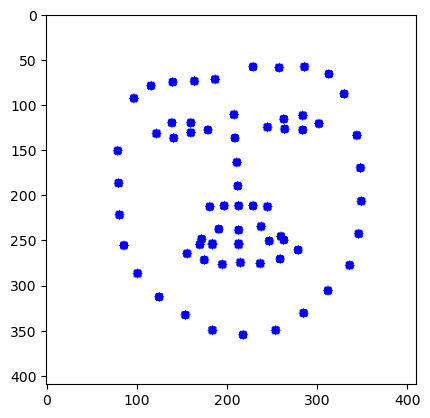

In [146]:
import cv2
import numpy as np

image6 = cv2.imread('../cropped_img.png')
image7 = cv2.cvtColor(image6, cv2.COLOR_BGR2GRAY)
width, height = image7.shape


# Make empty black image of size (100,100)
img5 = np.full((width,height),255)
cv2.imwrite('../blank.png', img5)
img6 = cv2.imread('../blank.png')
pts = landnew
pts
for i in pts:    
    img6 = cv2.circle(img6, (int(i[0]),int(i[1])), radius=5, color=(0,0,255), thickness=-1)
cv2.imwrite('../ONLYLANDMARKS_IMG.png', img6)
plt.imshow(img6)